### IMPORT LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tkinter import messagebox, Tk
import tkinter as tk 

### DATA PREPROCESSING

In [4]:
#Read Data
data = pd.read_csv('Dataset/Loan_dataset.csv')

In [6]:
#Provides a summary of basic statistical details of the data
data.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [8]:
#Data content
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [10]:
#Check the null data
data.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [12]:
#Data types
data.dtypes

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

In [14]:
data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

### Look at the suitability of object data types for Label Encoder

In [17]:
data['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [19]:
data['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [21]:
data['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced', 'Widowed'], dtype=object)

In [23]:
data['HomeOwnershipStatus'].unique()

array(['Own', 'Mortgage', 'Rent', 'Other'], dtype=object)

In [25]:
data['LoanPurpose'].unique()

array(['Home', 'Debt Consolidation', 'Education', 'Other', 'Auto'],
      dtype=object)

In [27]:
#Drop Date
data = data.drop(columns =['ApplicationDate'], axis=1)
data

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,Employed,High School,19,24521,36,Married,3,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,56,49246,567,Employed,Associate,33,25818,36,Married,5,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,44,48958,645,Employed,Bachelor,20,37033,72,Married,3,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,60,41025,560,Employed,High School,36,14760,72,Married,3,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [29]:
data['RiskScore'].describe()

count    20000.000000
mean        50.766780
std          7.778262
min         28.800000
25%         46.000000
50%         52.000000
75%         56.000000
max         84.000000
Name: RiskScore, dtype: float64

In [31]:
#Separate the categorical ones
categorical_columns = ['LoanPurpose', 'HomeOwnershipStatus', 'MaritalStatus', 'EducationLevel', 'EmploymentStatus']
label_encoders = {}

for column in categorical_columns:
    labelEncoder = LabelEncoder()
    data[column] = labelEncoder.fit_transform(data[column])
    label_encoders[column] = labelEncoder

# Separating the target variable and properties
X = data.drop(columns=['RiskScore'])  # Features
y = data['RiskScore']                # Target Variable

### MODEL TRAINING

In [34]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
# 1. Model: Random Forest Regressor
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [37]:
# 2. Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

### CALCULATING SUCCESS METRICS

In [39]:
def calculate_metrics(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mse, mae

rf_metrics = calculate_metrics(y_test, rf_pred)
lr_metrics = calculate_metrics(y_test, lr_pred)

Random Forest Metrics:
R²: 0.99, MSE: 0.88, MAE: 0.59

Linear Regression Metrics:
R²: 0.93, MSE: 4.06, MAE: 1.53


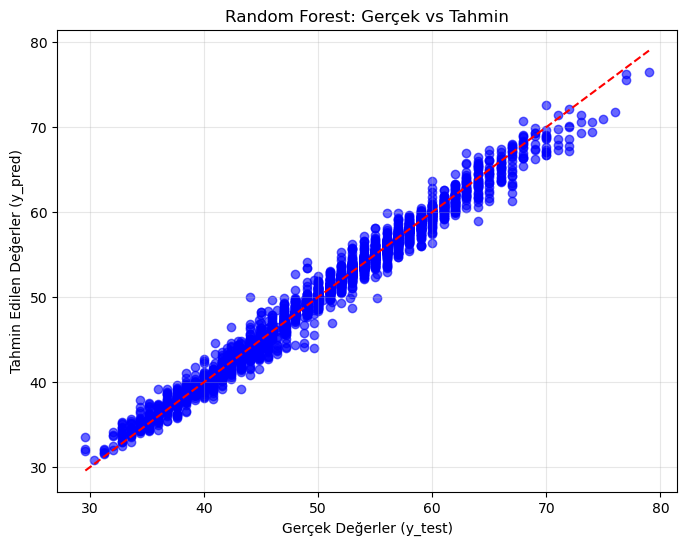

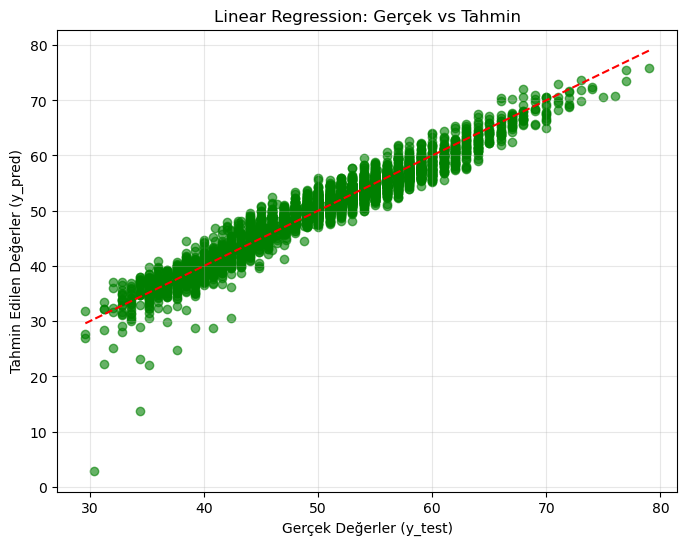

In [43]:
# Printing success rates
print("Random Forest Metrics:")
print(f"R²: {rf_metrics[0]:.2f}, MSE: {rf_metrics[1]:.2f}, MAE: {rf_metrics[2]:.2f}")

print("\nLinear Regression Metrics:")
print(f"R²: {lr_metrics[0]:.2f}, MSE: {lr_metrics[1]:.2f}, MAE: {lr_metrics[2]:.2f}")


# Creating graphics: Separate graphics for each model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Gerçek vs Tahmin')
plt.xlabel('Gerçek Değerler (y_test)')
plt.ylabel('Tahmin Edilen Değerler (y_pred)')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Gerçek vs Tahmin')
plt.xlabel('Gerçek Değerler (y_test)')
plt.ylabel('Tahmin Edilen Değerler (y_pred)')
plt.grid(alpha=0.3)
plt.show()

### GUI

In [46]:
class RiskScoreApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Risk Score Prediction Application")

        self.entries = {}  # Dictionary to store entry fields for user input

        # Dynamically create input fields for independent variables in the dataset
        frame = tk.Frame(root)
        frame.pack(pady=10)

        row, col = 0, 0
        # first_row_values = {Age': 45, 'AnnualIncome': 39948, 'CreditScore': 617, 'EmploymentStatus': 1, 'EducationLevel': 3, 'Experience': 22, 'LoanAmount': 13152, 'LoanDuration': 48, 'MaritalStatus': 1, 'NumberOfDependents': 2, 'HomeOwnershipStatus': 2, 'MonthlyDebtPayments': 183, 'CreditCardUtilizationRate': 0.3544, 'NumberOfOpenCreditLines': 1, 'NumberOfCreditInquiries': 2, 'DebtToIncomeRatio': 0.3583, 'BankruptcyHistory': 0, 'LoanPurpose': 3, 'PreviousLoanDefaults': 0, 'PaymentHistory': 29, 'LengthOfCreditHistory': 9, 'SavingsAccountBalance': 7632, 'CheckingAccountBalance': 1202, 'TotalAssets': 146111, 'TotalLiabilities': 19183, 'MonthlyIncome': 3329.0, 'UtilityBillsPaymentHistory': 0.725, 'JobTenure': 11, 'NetWorth': 126928, 'BaseInterestRate': 0.1997, 'InterestRate': 0.2276, 'MonthlyLoanPayment': 419.81, 'TotalDebtToIncomeRatio': 0.1811, 'LoanApproved': 0}
        first_row_values = data.iloc[19996].to_dict()  # Does the same job as the line above
        for idx, col_name in enumerate(X.columns):
            label = tk.Label(frame, text=col_name, width=20, anchor='w')
            label.grid(row=row, column=col * 2, padx=5, pady=5)

            entry = tk.Entry(frame, width=10)
            entry.insert(0, str(first_row_values.get(col_name, '')))  # Insert the first row values into the input fields
            entry.grid(row=row, column=col * 2 + 1, padx=5, pady=5)
            self.entries[col_name] = entry  # Store each input field in the dictionary

            if col == 1:  # 2-column layout
                row += 1
                col = 0
            else:
                col += 1

        # Predict Button
        predict_button = tk.Button(root, text="Predict Risk Score (Linear)", command=self.predict_risk_score)
        predict_button.pack(pady=10)

    def predict_risk_score(self):
        try:
            # Get user input values and convert them into a DataFrame
            user_input = {col: float(self.entries[col].get()) for col in X.columns}  
            user_df = pd.DataFrame([user_input])  # Single-row DataFrame

            # Fill missing columns with default values
            for col in X.columns:
                if col not in user_df.columns:
                    user_df[col] = 0

            # Reorder columns to match the training set
            user_df = user_df[X.columns]

            # Make RiskScore prediction
            prediction = lr_model.predict(user_df)[0]
            messagebox.showinfo("Linear Prediction Result", f"Predicted Risk Score: {prediction:.2f}")
        except ValueError as e:
            messagebox.showerror("Error", "Invalid input values. Please enter all values as numbers.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

if __name__ == "__main__":
    root = tk.Tk()
    app = RiskScoreApp(root)
    root.mainloop()


In [47]:
class RiskScoreApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Risk Score Prediction Application")

        self.entries = {}  # Stores entry fields for values entered by the user

        # Dynamically create input fields for independent variables in the dataset
        frame = tk.Frame(root)
        frame.pack(pady=10)

        row, col = 0, 0
        #first_row_values = {Age': 45, 'AnnualIncome': 39948, 'CreditScore': 617, 'EmploymentStatus': 1, 'EducationLevel': 3, 'Experience': 22, 'LoanAmount': 13152, 'LoanDuration': 48, 'MaritalStatus': 1, 'NumberOfDependents': 2, 'HomeOwnershipStatus': 2, 'MonthlyDebtPayments': 183, 'CreditCardUtilizationRate': 0.3544, 'NumberOfOpenCreditLines': 1, 'NumberOfCreditInquiries': 2, 'DebtToIncomeRatio': 0.3583, 'BankruptcyHistory': 0, 'LoanPurpose': 3, 'PreviousLoanDefaults': 0, 'PaymentHistory': 29, 'LengthOfCreditHistory': 9, 'SavingsAccountBalance': 7632, 'CheckingAccountBalance': 1202, 'TotalAssets': 146111, 'TotalLiabilities': 19183, 'MonthlyIncome': 3329.0, 'UtilityBillsPaymentHistory': 0.725, 'JobTenure': 11, 'NetWorth': 126928, 'BaseInterestRate': 0.1997, 'InterestRate': 0.2276, 'MonthlyLoanPayment': 419.81, 'TotalDebtToIncomeRatio': 0.1811, 'LoanApproved': 0}
        first_row_values = data.iloc[2041].to_dict()  # Does the same thing as the line above
        for idx, col_name in enumerate(X.columns):
            label = tk.Label(frame, text=col_name, width=20, anchor='w')
            label.grid(row=row, column=col * 2, padx=5, pady=5)

            entry = tk.Entry(frame, width=10)
            entry.insert(0, str(first_row_values.get(col_name, '')))  # Insert the first row values into the input field
            entry.grid(row=row, column=col * 2 + 1, padx=5, pady=5)
            self.entries[col_name] = entry  # Store each input in the dictionary

            if col == 1:  # Two-column layout
                row += 1
                col = 0
            else:
                col += 1

        # Predict Button
        predict_button = tk.Button(root, text="Predict Risk Score (RandomForest)", command=self.predict_risk_score)
        predict_button.pack(pady=10)

    def predict_risk_score(self):
        try:
            # Get values entered by the user and convert to a dataframe
            user_input = {col: float(self.entries[col].get()) for col in X.columns}  
            user_df = pd.DataFrame([user_input])  # Single-row DataFrame

            # Fill missing columns with zeros
            for col in X.columns:
                if col not in user_df.columns:
                    user_df[col] = 0

            # Reorder columns to match the training dataset
            user_df = user_df[X.columns]

            # Make a prediction for the RiskScore
            prediction = rf_model.predict(user_df)[0]
            messagebox.showinfo("Random Forest Prediction Result", f"Predicted Risk Score: {prediction:.2f}")
        except ValueError as e:
            messagebox.showerror("Error", "Input values are invalid. Please enter all values as numbers.")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

if __name__ == "__main__":
    root = tk.Tk()
    app = RiskScoreApp(root)
    root.mainloop()
